# Tubes 1 Probstat

## Dependencies

In [39]:
import warnings
import numpy as np
import pandas as pd
import scipy.stats as st
import io
import matplotlib
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')


## 1. Dataset 1 : fifa.csv

In [40]:
data = pd.read_csv('fifa.csv')
data

Name  Age          Nationality
0                  L. Messi   31            Argentina
1         Cristiano Ronaldo   33             Portugal
2                 Neymar Jr   26               Brazil
3                    De Gea   27                Spain
4              K. De Bruyne   27              Belgium
5                 E. Hazard   27              Belgium
6                 L. Modrić   32              Croatia
7                 L. Suárez   31              Uruguay
8              Sergio Ramos   32                Spain
9                  J. Oblak   25             Slovenia
10           R. Lewandowski   29               Poland
11                 T. Kroos   28              Germany
12                 D. Godín   32              Uruguay
13              David Silva   32                Spain
14                 N. Kanté   27               France
15                P. Dybala   24            Argentina
16                  H. Kane   24              England
17             A. Griezmann   27               France
18            M. ter Stegen   26              Germany
19              T. Courtois   26              Belgium
20          Sergio Busquets   29                Spain
21                E. Cavani   31              Uruguay
22                 M. Neuer   32              Germany
23                S. Agüero   30            Argentina
24             G. Chiellini   33                Italy
25                K. Mbappé   19               France
26                 M. Salah   26                Egypt
27                 Casemiro   26               Brazil
28             J. Rodríguez   26             Colombia
29               L. Insigne   27                Italy
...                     ...  ...                  ...
18177             R. Roache   18  Republic of Ireland
18178          L. Wahlstedt   18               Sweden
18179           J. Williams   17              England
18180              M. Hurst   22             Scotland
18181              C. Maher   17  Republic of Ireland
18182               Y. Góez   18             Colombia
18183         K. Pilkington   44              England
18184             D. Horton   18              England
18185              E. Tweed   19  Republic of Ireland
18186          Zhang Yufeng   20             China PR
18187             C. Ehlich   19              Germany
18188            L. Collins   17                Wales
18189            A. Kaltner   18              Germany
18190            L. Watkins   18              England
18191  J. Norville-Williams   18              England
18192             S. Squire   18              England
18193            N. Fuentes   18                Chile
18194              J. Milli   18                Italy
18195            S. Griffin   18  Republic of Ireland
18196           K. Fujikawa   19                Japan
18197            D. Holland   18  Republic of Ireland
18198            J. Livesey   18              England
18199          M. Baldisimo   18               Canada
18200              J. Young   18             Scotland
18201              D. Walsh   18  Republic of Ireland
18202          J. Lundstram   19              England
18203    N. Christoffersson   19               Sweden
18204             B. Worman   16              England
18205        D. Walker-Rice   17              England
18206             G. Nugent   16              England

[18207 rows x 3 columns]

## 1.1 Visualisasi Data

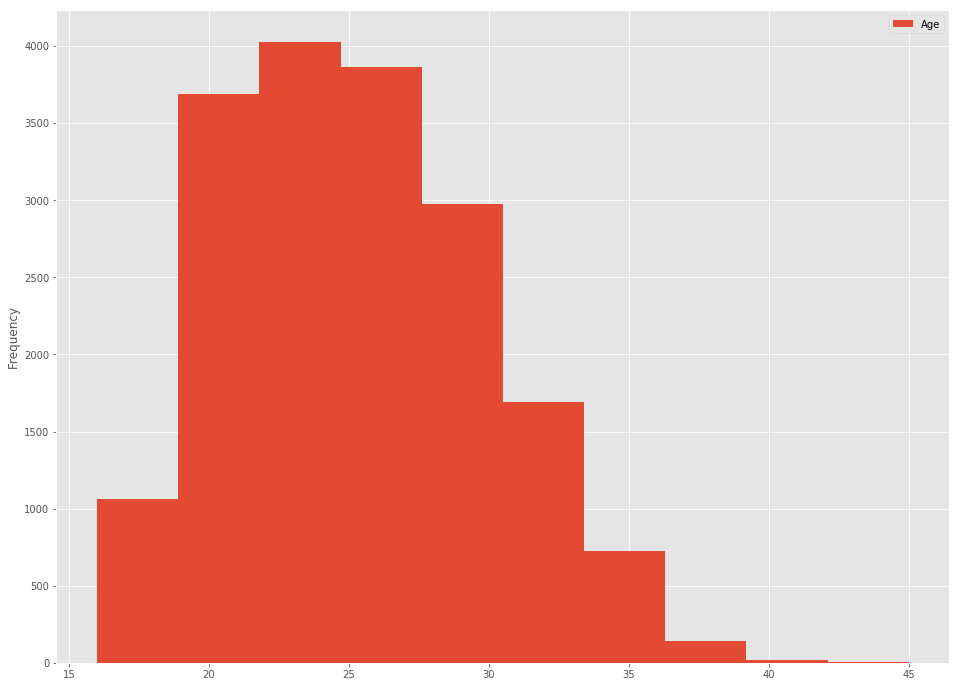

In [41]:
data.plot(kind = 'hist')

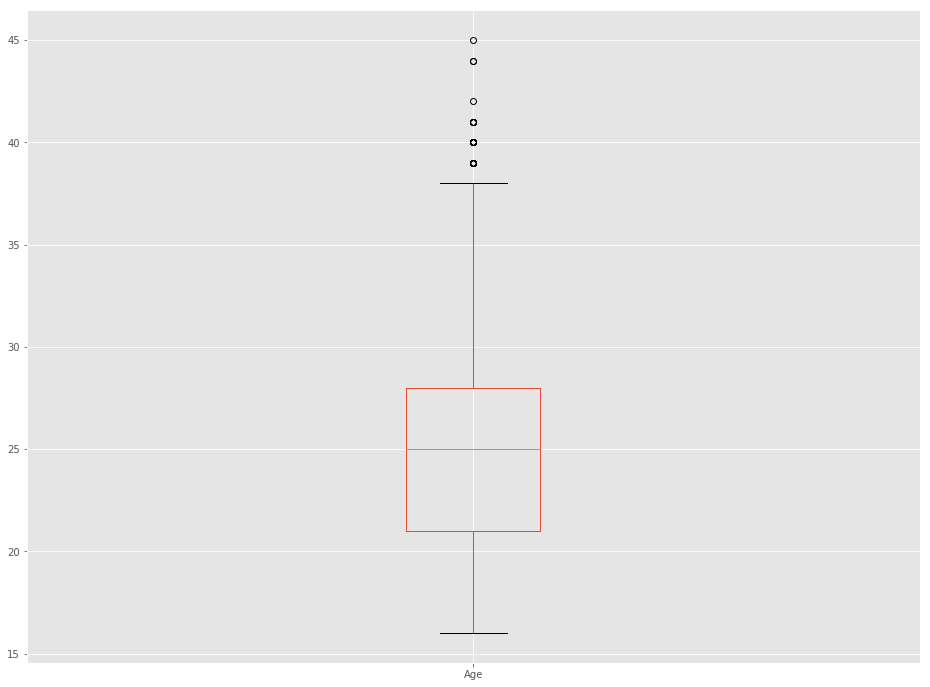

In [42]:
data.plot(kind = 'box')

## 1.2 Statistical Description

In [43]:
data.min()

Name              A. Abang
Age                     16
Nationality    Afghanistan
dtype: object

In [44]:
data.max()

Name           Óscar Whalley
Age                       45
Nationality         Zimbabwe
dtype: object

In [45]:
data.mean()

Age    25.122206
dtype: float64

In [46]:
data.mode()

Name  Age Nationality
0  J. Rodríguez   21     England

In [47]:
data.median()

Age    25.0
dtype: float64

In [48]:
data.var()

Age    21.808365
dtype: float64

In [49]:
data.std()

Age    4.669943
dtype: float64

In [50]:
data.skew()

Age    0.391764
dtype: float64

In [51]:
data.kurt()

Age   -0.459514
dtype: float64

## 1.3 Fungsi Distribusi peluang yang paling sesuai

Text(0, 0.5, 'Freq set')

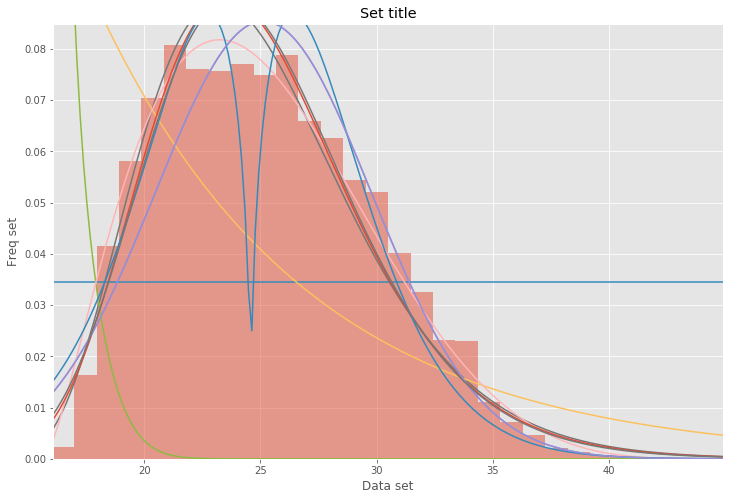

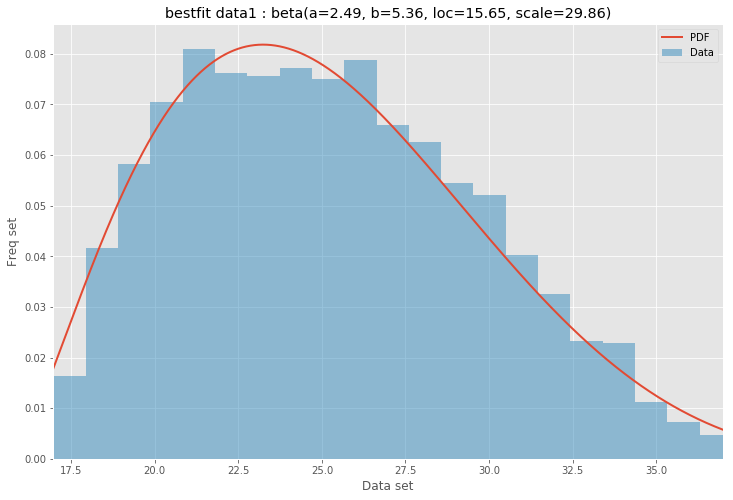

In [52]:
data = data['Age']
matplotlib.rcParams['figure.figsize'] = (16.0, 12.0)
matplotlib.style.use('ggplot')

# Create models from data
def best_fit_distribution(data, bins=200, ax=None):
    """Model data by finding best fit distribution to data"""
    # Get histogram of original data
    y, x = np.histogram(data, bins=bins, density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0

    # Distributions to check
    DISTRIBUTIONS = [        
        st.hypergeom, st.binom, st.multinomial, st.nbinom, st.geom, st.poisson, st.uniform, st.norm, st.gamma, st.expon, st.chi, st.beta, st.lognorm, st.dweibull, st.t, st.f
    ]

    # Best holders
    best_distribution = st.norm
    best_params = (0.0, 1.0)
    best_sse = np.inf

    # Estimate distribution parameters from data
    for distribution in DISTRIBUTIONS:

        # Try to fit the distribution
        try:
            # Ignore warnings from data that can't be fit
            with warnings.catch_warnings():
                warnings.filterwarnings('ignore')

                # fit dist to data
                params = distribution.fit(data)

                # Separate parts of parameters
                arg = params[:-2]
                loc = params[-2]
                scale = params[-1]

                # Calculate fitted PDF and error with fit in distribution
                pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
                sse = np.sum(np.power(y - pdf, 2.0))

                # if axis pass in add to plot
                try:
                    if ax:
                        pd.Series(pdf, x).plot(ax=ax)
                    end
                except Exception:
                    pass

                # identify if this distribution is better
                if best_sse > sse > 0:
                    best_distribution = distribution
                    best_params = params
                    best_sse = sse

        except Exception:
            pass

    return (best_distribution.name, best_params)

def make_pdf(dist, params, size=10000):
    """Generate distributions's Probability Distribution Function """

    # Separate parts of parameters
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]

    # Get sane start and end points of distribution
    start = dist.ppf(0.01, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.01, loc=loc, scale=scale)
    end = dist.ppf(0.99, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.99, loc=loc, scale=scale)

    # Build PDF and turn into pandas Series
    x = np.linspace(start, end, size)
    y = dist.pdf(x, loc=loc, scale=scale, *arg)
    pdf = pd.Series(y, x)

    return pdf

#----------------------------------- VISUALIZATION ------------------------------------
# Load data from statsmodels datasets
#data = pd.Series(sm.datasets.fifa.load_pandas().data) #diubah di sini

# Plot for comparison
plt.figure(figsize=(12,8))
ax = data.plot(kind='hist', bins=30, normed=True, alpha=0.5)
# Save plot limits
dataYLim = ax.get_ylim()

# Find best fit distribution
best_fit_name, best_fit_params = best_fit_distribution(data, 200, ax)
best_dist = getattr(st, best_fit_name)

# Update plots
ax.set_ylim(dataYLim)
ax.set_title('Set title')
ax.set_xlabel('Data set')
ax.set_ylabel('Freq set')

# Make PDF with best params 
pdf = make_pdf(best_dist, best_fit_params)

# Display
plt.figure(figsize=(12,8))
ax = pdf.plot(lw=2, label='PDF', legend=True)
data.plot(kind='hist', bins=30, normed=True, alpha=0.5, label='Data', legend=True, ax=ax)

param_names = (best_dist.shapes + ', loc, scale').split(', ') if best_dist.shapes else ['loc', 'scale']
param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, best_fit_params)])
dist_str = '{}({})'.format(best_fit_name, param_str)

ax.set_title('bestfit data1 : ' + dist_str)
ax.set_xlabel('Data set')
ax.set_ylabel('Freq set')

## 1.4 Jawaban Pertanyaan

### 1.4.1

In [53]:
st.beta.cdf(22,2.49,5.36,15.65,29.86)*1000

286.34014730435433

#### Ekspektasi banyak pemain bola dengan umur kurang dari 22 tahun sebanyak 287 orang

### 1.4.2

In [54]:
st.beta.sf(40,2.49,5.36,15.65,29.86)*1000

1.140546343523341

#### Ekspektasi banyak pemain bola dengan umur lebih dari 40 tahun sebanyak 2 orang

## 2. Dataset 2 : black_friday.csv

In [55]:
data = pd.read_csv('black_friday.csv')
data.columns = ['data']
data

data
0       15200
1        1422
2        1057
3        7969
4       15227
5       19215
6       15854
7       15686
8        7871
9        5254
10       3957
11       6073
12      15665
13       5378
14       2079
15      13055
16       8851
17      11788
18      19614
19       8584
20       9872
21       9743
22       5982
23      11927
24      16662
25       5887
26       6973
27       5391
28      16352
29       8886
...       ...
537546  11543
537547  20924
537548  13082
537549  11658
537550   6863
537551  16415
537552  18526
537553   7099
537554    578
537555   2183
537556  12724
537557   7796
537558   7770
537559   5940
537560   7834
537561  11508
537562   6074
537563   7084
537564   7934
537565   5350
537566   1994
537567   5930
537568   7042
537569  15491
537570  11852
537571  11664
537572  19196
537573   8043
537574   7172
537575   6875

[537576 rows x 1 columns]

## 2.1 Visualisasi Data

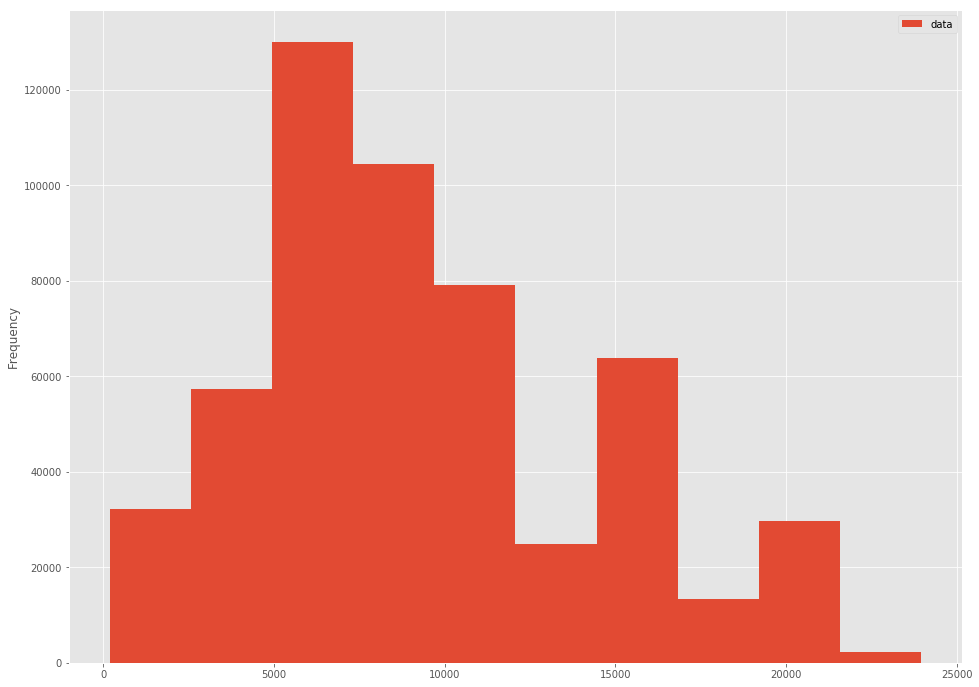

In [56]:
data.plot(kind = 'hist')

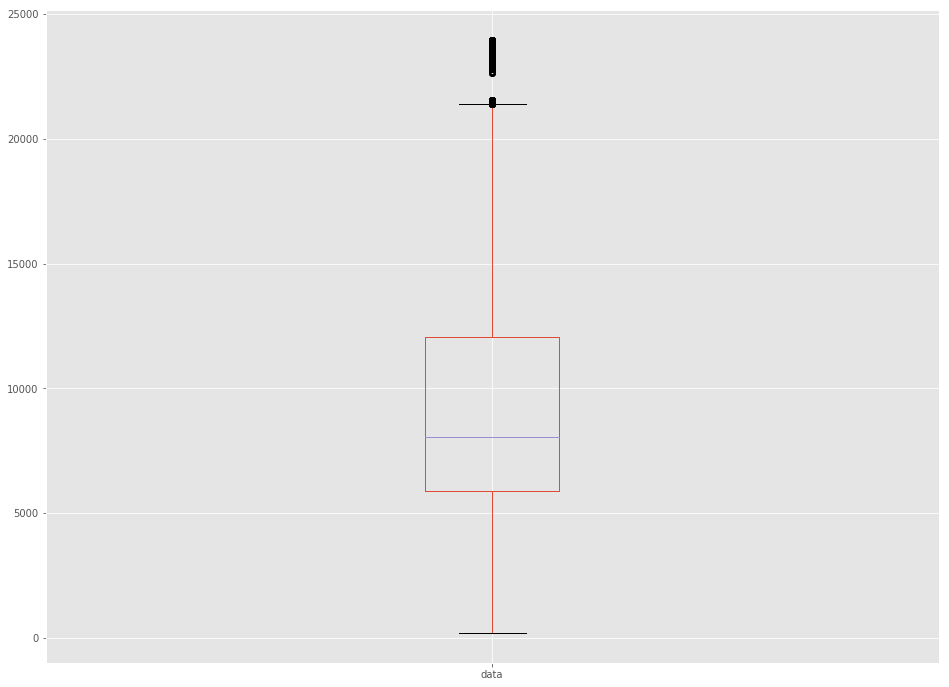

In [57]:
data.plot(kind = 'box')

## 2.2 Statistical Description

In [58]:
data.min()

data    185
dtype: int64

In [59]:
data.max()

data    23961
dtype: int64

In [60]:
data.mean()

data    9333.861646
dtype: float64

In [61]:
data.mode()

data
0  6855

In [62]:
data.median()

data    8062.0
dtype: float64

In [63]:
data.var()

data    2.481063e+07
dtype: float64

In [64]:
data.std()

data    4981.026592
dtype: float64

In [65]:
data.skew()

data    0.624278
dtype: float64

In [66]:
data.kurt()

data   -0.343127
dtype: float64

## 2.3 Fungsi Distribusi peluang yang paling sesuai

Text(0, 0.5, 'Freq set')

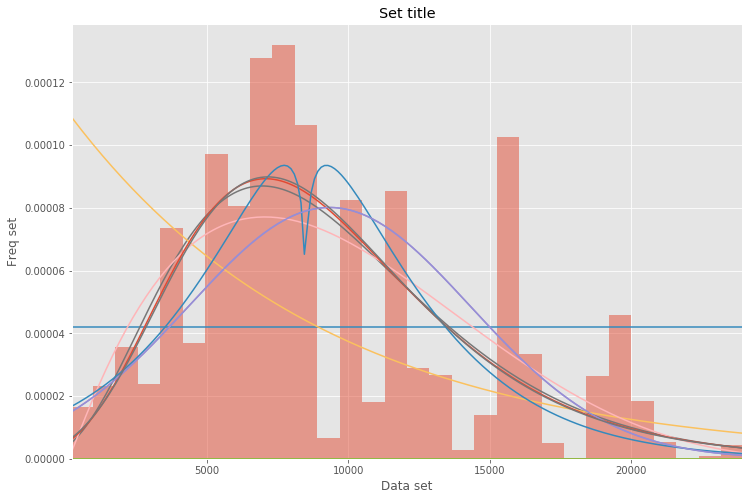

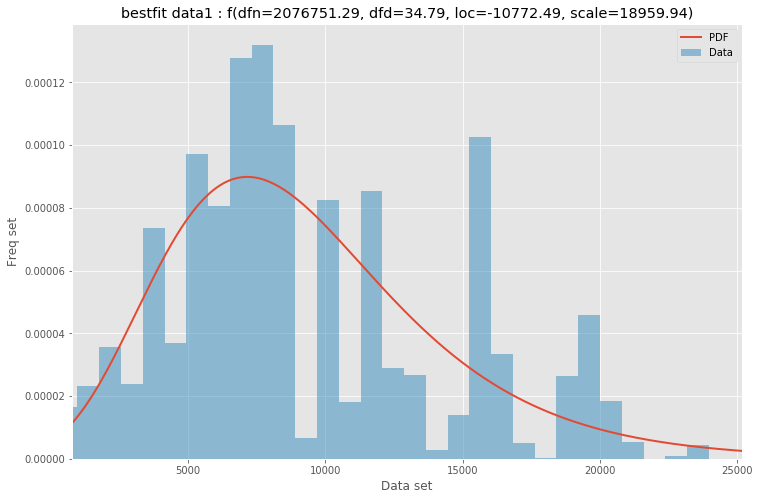

In [67]:
data = data['data']
matplotlib.rcParams['figure.figsize'] = (16.0, 12.0)
matplotlib.style.use('ggplot')

#----------------------------------- VISUALIZATION ------------------------------------
# Load data from statsmodels datasets
#data = pd.Series(sm.datasets.fifa.load_pandas().data) #diubah di sini

# Plot for comparison
plt.figure(figsize=(12,8))
ax = data.plot(kind='hist', bins=30, normed=True, alpha=0.5)
# Save plot limits
dataYLim = ax.get_ylim()

# Find best fit distribution
best_fit_name, best_fit_params = best_fit_distribution(data, 200, ax)
best_dist = getattr(st, best_fit_name)

# Update plots
ax.set_ylim(dataYLim)
ax.set_title('Set title')
ax.set_xlabel('Data set')
ax.set_ylabel('Freq set')

# Make PDF with best params 
pdf = make_pdf(best_dist, best_fit_params)

# Display
plt.figure(figsize=(12,8))
ax = pdf.plot(lw=2, label='PDF', legend=True)
data.plot(kind='hist', bins=30, normed=True, alpha=0.5, label='Data', legend=True, ax=ax)

param_names = (best_dist.shapes + ', loc, scale').split(', ') if best_dist.shapes else ['loc', 'scale']
param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, best_fit_params)])
dist_str = '{}({})'.format(best_fit_name, param_str)

ax.set_title('bestfit data1 : ' + dist_str)
ax.set_xlabel('Data set')
ax.set_ylabel('Freq set')

## 2.4 Jawaban Pertanyaan

### 2.4.1

#### 2.4.1.1

In [86]:
st.f.cdf(1000,2076751.29,34.79,-10772.49,18959.94)*250

3.1736627410936884

#### Ekspektasi jumlah orang miskin adalah 4 orang

#### 2.4.1.2

In [87]:
st.f.sf(10000,2076751.29,34.79,-10772.49,18959.94)*250

96.05068606321095

#### Ekspektasi jumlah orang kaya adalah 97 orang

#### 2.4.1.3

In [88]:
st.f.sf(20000,2076751.29,34.79,-10772.49,18959.94)*250

9.257797669286052

#### Ekspektasi jumlah orang Crazy Rich adalah 10 orang

### 2.4.2

#### 2.4.2.1

In [91]:
(st.f.cdf(2000,2076751.29,34.79,-10772.49,18959.94) - st.f.cdf(1980,2076751.29,34.79,-10772.49,18959.94))*1000

0.5443703044718945

#### Ekspektasi jumlah orang pembeli Galaxy Fold adalah 1 orang

#### 2.4.2.2

In [92]:
(st.f.cdf(2897,2076751.29,34.79,-10772.49,18959.94) - st.f.cdf(2707,2076751.29,34.79,-10772.49,18959.94))*1000

7.801923174293256

#### Ekspektasi jumlah orang yang membeli barang - barang tersebut adalah 8 orang

## 3. Dataset 4 : crypto.csv

In [70]:
data = pd.read_csv('crypto.csv')
data.columns = ['data']
data

data
0       0.000023
1       0.000033
2       0.000037
3       0.000037
4       0.000037
5       0.000036
6       0.000073
7       0.000072
8       0.000073
9       0.000067
10      0.000069
11      0.000082
12      0.000113
13      0.000111
14      0.000112
15      0.000124
16      0.000124
17      0.000113
18      0.000109
19      0.000098
20      0.000090
21      0.000086
22      0.000085
23      0.000085
24      0.000084
25      0.000082
26      0.000081
27      0.000060
28      0.000037
29      0.000034
...          ...
632187  0.113194
632188  0.087992
632189  0.101825
632190  0.334725
632191  0.690254
632192  0.625767
632193  0.230924
632194  0.114744
632195  0.089624
632196  0.143865
632197  0.112651
632198  0.126489
632199  0.145279
632200  0.132727
632201  0.126085
632202  0.225772
632203  0.129094
632204  0.228046
632205  0.323451
632206  0.073590
632207  0.074413
632208  0.061524
632209  0.130473
632210  0.211989
632211  0.070326
632212  0.045676
632213  0.057948
632214  0.082787
632215  0.091944
632216  0.089511

[632217 rows x 1 columns]

## 3.1 Visualisasi Data

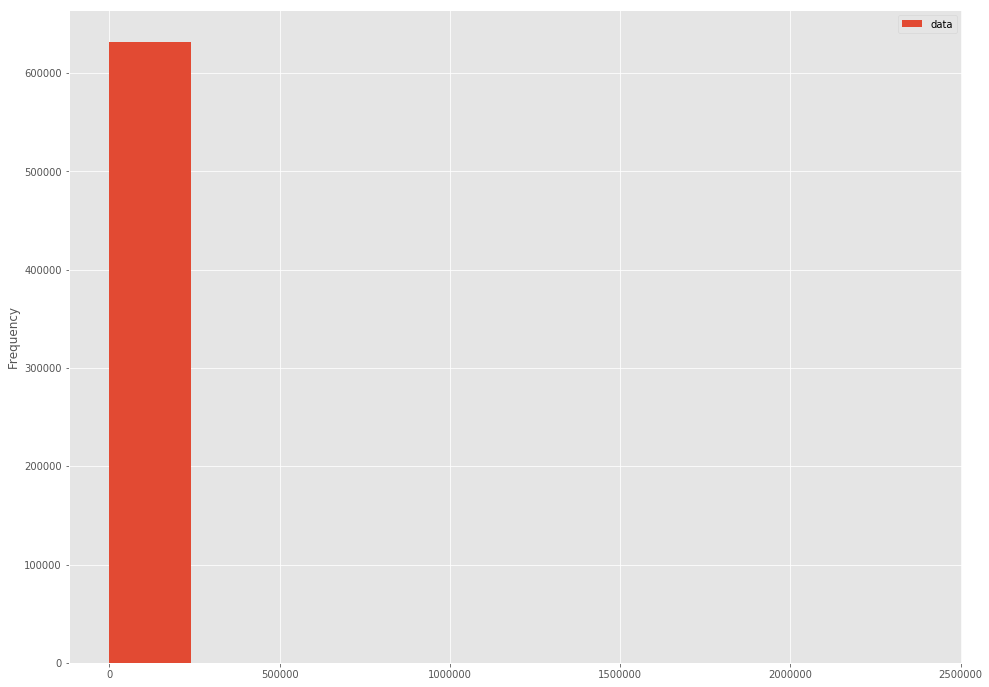

In [71]:
data.plot(kind = 'hist')

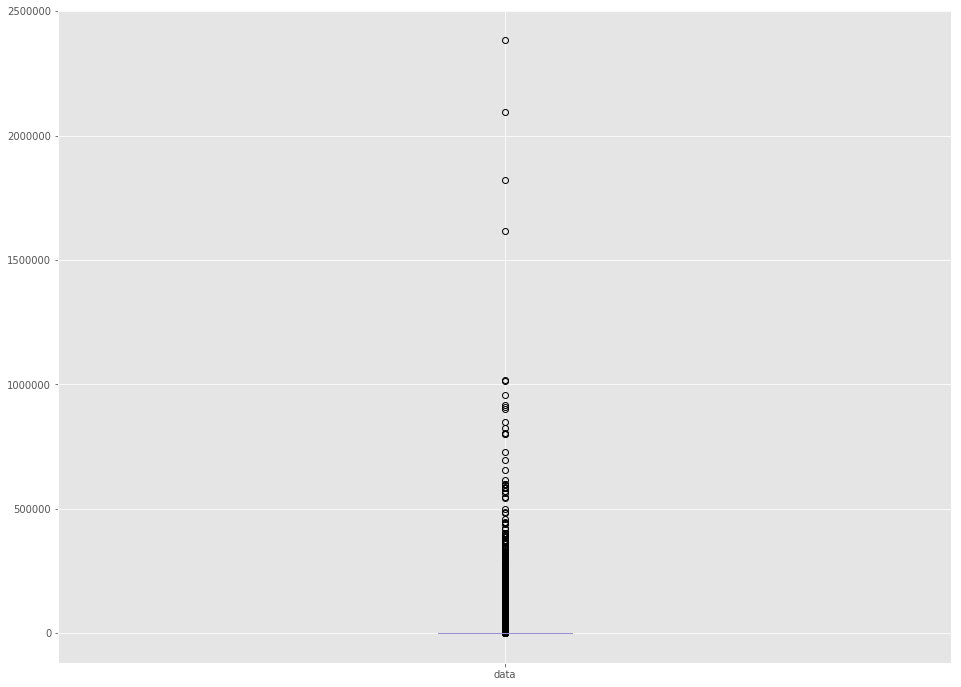

In [72]:
data.plot(kind = 'box')

## 3.2 Statistical Description

In [73]:
data.min()

data    2.925000e-09
dtype: float64

In [74]:
data.max()

data    2383502.5
dtype: float64

In [75]:
data.mean()

data    203.018467
dtype: float64

In [76]:
data.mode()

data
0  0.000002

In [77]:
data.median()

data    0.009734
dtype: float64

In [78]:
data.var()

data    7.532053e+07
dtype: float64

In [79]:
data.std()

data    8678.740363
dtype: float64

In [80]:
data.skew()

data    118.239514
dtype: float64

In [81]:
data.kurt()

data    22297.435591
dtype: float64

## 3.3 Fungsi Distribusi peluang yang paling sesuai

Text(0, 0.5, 'Freq set')

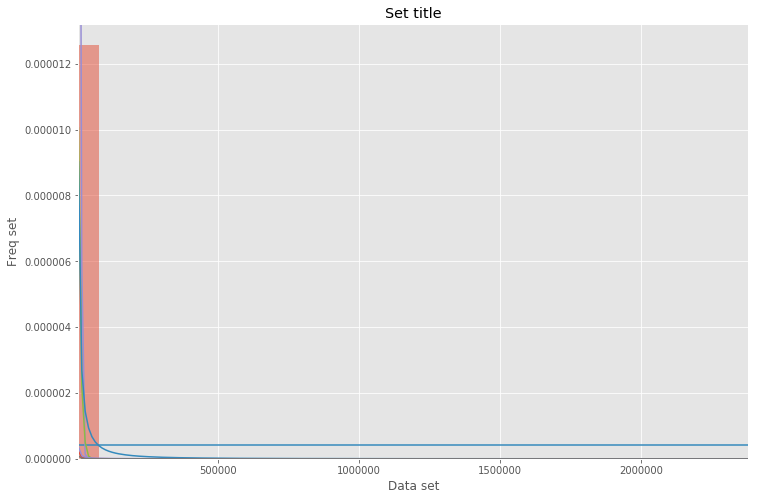

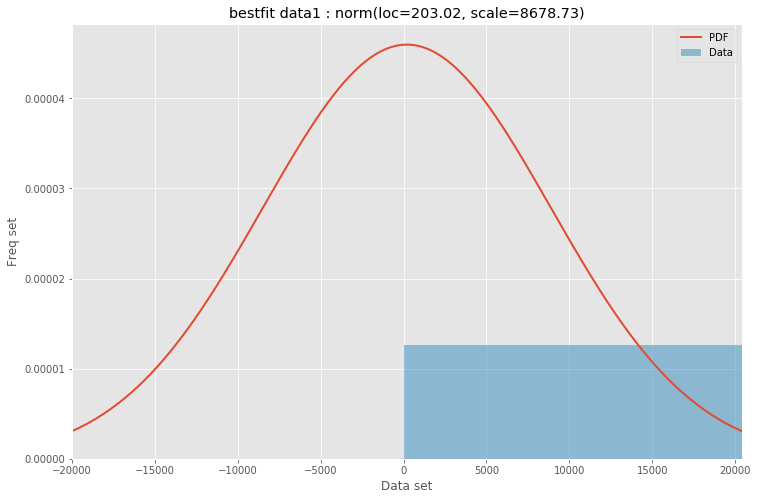

In [82]:
data = data['data']
matplotlib.rcParams['figure.figsize'] = (16.0, 12.0)
matplotlib.style.use('ggplot')

#----------------------------------- VISUALIZATION ------------------------------------
# Load data from statsmodels datasets
#data = pd.Series(sm.datasets.fifa.load_pandas().data) #diubah di sini

# Plot for comparison
plt.figure(figsize=(12,8))
ax = data.plot(kind='hist', bins=30, normed=True, alpha=0.5)
# Save plot limits
dataYLim = ax.get_ylim()

# Find best fit distribution
best_fit_name, best_fit_params = best_fit_distribution(data, 200, ax)
best_dist = getattr(st, best_fit_name)

# Update plots
ax.set_ylim(dataYLim)
ax.set_title('Set title')
ax.set_xlabel('Data set')
ax.set_ylabel('Freq set')

# Make PDF with best params 
pdf = make_pdf(best_dist, best_fit_params)

# Display
plt.figure(figsize=(12,8))
ax = pdf.plot(lw=2, label='PDF', legend=True)
data.plot(kind='hist', bins=30, normed=True, alpha=0.5, label='Data', legend=True, ax=ax)

param_names = (best_dist.shapes + ', loc, scale').split(', ') if best_dist.shapes else ['loc', 'scale']
param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, best_fit_params)])
dist_str = '{}({})'.format(best_fit_name, param_str)

ax.set_title('bestfit data1 : ' + dist_str)
ax.set_xlabel('Data set')
ax.set_ylabel('Freq set')

## 3.4 Jawaban Pertanyaan

### 3.4.1

#### 3.4.1.1

In [95]:
st.norm.cdf(0.177013,203.02,8678.73)*1000

490.6765993648979

#### Ekspektasi jumlah cryptocurrency yang kurang dari 0.177013 adalah 491 data

#### 3.4.1.2

In [96]:
st.norm.sf(177.013,203.02,8678.73)*1000

501.1954832513927

#### Ekspektasi jumlah cryptocurrency yang lebih dari 177.013 adalah 502 data

### 3.4.2

#### 3.4.2.1

In [98]:
st.norm.sf(0.013,203.02,8678.73)

0.5093309378941849

#### Peluang cryptocurrency yang lebih dari 0.013 adalah 0.5093

#### 3.4.2.2

In [99]:
st.norm.cdf(17.7,203.02,8678.73)

0.49148189131595876

#### Peluang cryptocurrency yang kurang dari 17.7 adalah 0.4915

## 4. Dataset 5 : athletes.csv

In [17]:
data = pd.read_csv('athletes.csv')
data

Name  Medal
0                                             A Dijiang      0
1                                              A Lamusi      0
2                              A. Aanantha Sambu Mayavo      0
3                                       A. Abdul Razzak      0
4                                               A. Brun      0
5                                            A. Buydens      0
6                                        A. Charles Six      0
7                                          A. Christory      0
8                                             A. Darnis      0
9                                         A. Duponcheel      0
10                                           A. E. Page      0
11                                        A. G. Chagale      0
12                       A. Germaine Golding (Regnier-)      0
13                                           A. Godinat      0
14                                    A. Hurtado Vargas      0
15                                     A. Hussain Ahmed      0
16                                       A. J. J. Fridt      0
17              A. J. Tyronne Benildus "Benny" Fernando      0
18                                          A. Kordonis      0
19                                            A. Laffen      0
20                                        A. Lafontaine      0
21                                    A. Lambrecht, Jr.      0
22                                         A. O. Pinner      0
23                                         A. Papadakis      0
24                                           A. Porcher      0
25                                           A. Priftis      0
26                                             A. Roger      0
27                                         A. S. Harley      0
28                                    A. Sattar Basheer      0
29                                           A. Schmitt      0
...                                                 ...    ...
134701                            Isabelle Regina Werth     10
134702                                     Marit Bjrgen     10
134703                      Polina Hryhorivna Astakhova     10
134704                         Raisa Petrovna Smetanina     10
134705                      Raymond Clarence "Ray" Ewry     10
134706                                Stefania Belmondo     10
134707                    Vitaly Venediktovich Shcherbo     10
134708                                        Yang Yang     10
134709                        gnes Keleti-Srkny (Klein)     10
134710                    Aleksandr Vladimirovich Popov     11
134711                             Carl Townsend Osburn     11
134712                                Mark Andrew Spitz     11
134713                   Matthew Nicholas "Matt" Biondi     11
134714                        Viktor Ivanovych Chukarin     11
134715                           Vra slavsk (-Odloilov)     11
134716                          Aleksey Yuryevich Nemov     12
134717                           Birgit Fischer-Schmidt     12
134718             Dara Grace Torres (-Hoffman, -Minas)     12
134719  Jennifer Elisabeth "Jenny" Thompson (-Cumpelik)     12
134720                    Natalie Anne Coughlin (-Hall)     12
134721                             Paavo Johannes Nurmi     12
134722                               Ryan Steven Lochte     12
134723                                       Sawao Kato     12
134724                      Borys Anfiyanovych Shakhlin     13
134725                              Edoardo Mangiarotti     13
134726                              Ole Einar Bjrndalen     13
134727                                      Takashi Ono     13
134728                     Nikolay Yefimovich Andrianov     15
134729               Larysa Semenivna Latynina (Diriy-)     18
134730                          Michael Fred Phelps, II     28

[134731 rows x 2 columns]

## 4.1 Visualisasi Data

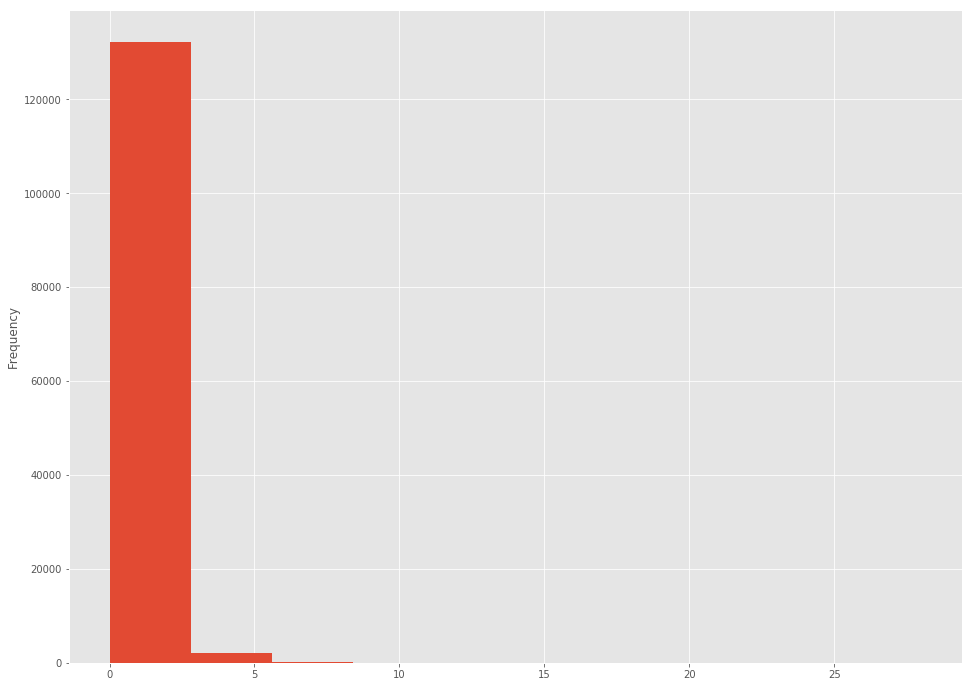

In [18]:
data = data['Medal']
data.plot(kind = 'hist')

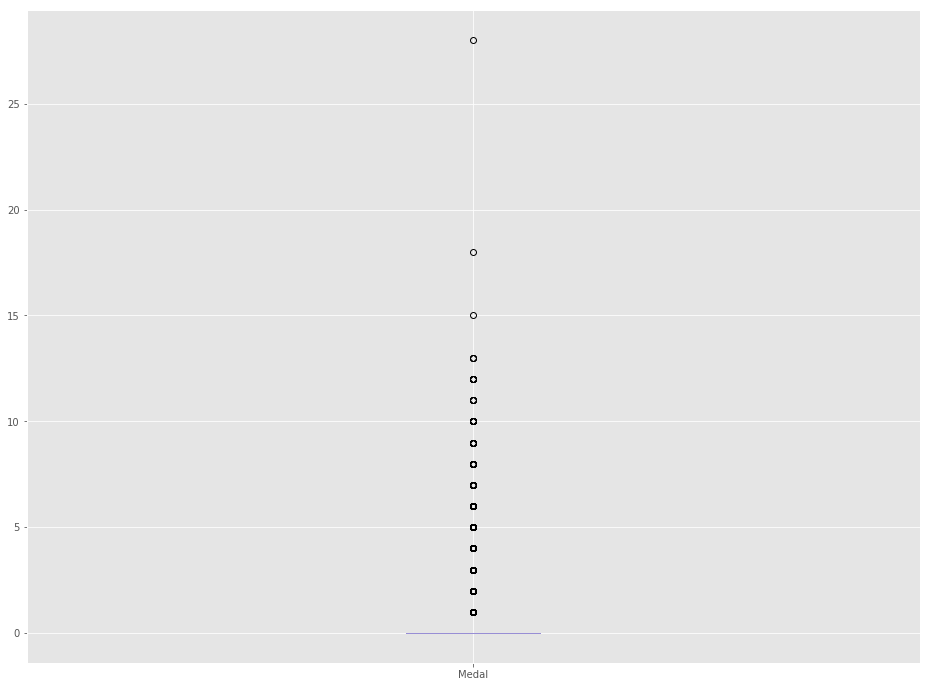

In [19]:
data.plot(kind = 'box')

## 4.2 Statistical Description

In [20]:
data.min()

0

In [21]:
data.max()

28

In [22]:
data.mean()

0.2952772561622789

In [23]:
data.mode()

0    0
dtype: int64

In [24]:
data.median()

0.0

In [25]:
data.var()

0.5252132778007574

In [26]:
data.std()

0.7247159980300956

In [27]:
data.skew()

4.8199987845312

In [28]:
data.kurt()

51.562525836059855

## 4.3 Fungsi Distribusi peluang yang paling sesuai

Text(0, 0.5, 'Freq set')

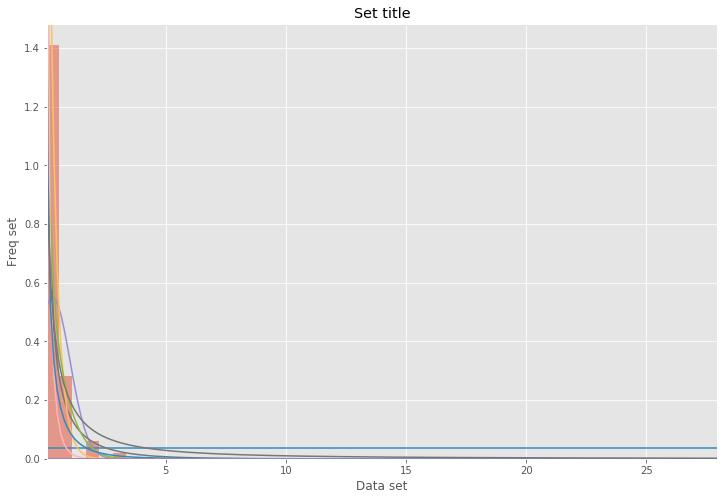

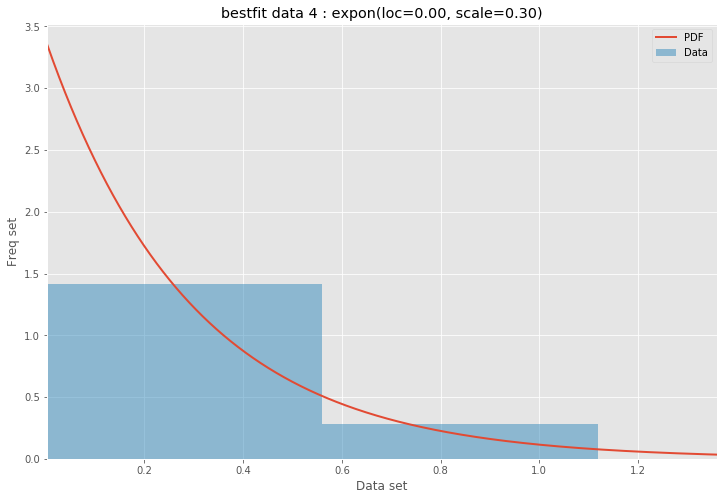

In [29]:
matplotlib.rcParams['figure.figsize'] = (16.0, 12.0)
matplotlib.style.use('ggplot')


#----------------------------------- VISUALIZATION ------------------------------------
# Load data from statsmodels datasets
#data = pd.Series(sm.datasets.fifa.load_pandas().data) #diubah di sini

# Plot for comparison
plt.figure(figsize=(12,8))
ax = data.plot(kind='hist', bins=50, normed=True, alpha=0.5)
# Save plot limits
dataYLim = ax.get_ylim()

# Find best fit distribution
best_fit_name, best_fit_params = best_fit_distribution(data, 200, ax)
best_dist = getattr(st, best_fit_name)

# Update plots
ax.set_ylim(dataYLim)
ax.set_title('Set title')
ax.set_xlabel('Data set')
ax.set_ylabel('Freq set')

# Make PDF with best params 
pdf = make_pdf(best_dist, best_fit_params)

# Display
plt.figure(figsize=(12,8))
ax = pdf.plot(lw=2, label='PDF', legend=True)
data.plot(kind='hist', bins=50, normed=True, alpha=0.5, label='Data', legend=True, ax=ax)

param_names = (best_dist.shapes + ', loc, scale').split(', ') if best_dist.shapes else ['loc', 'scale']
param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, best_fit_params)])
dist_str = '{}({})'.format(best_fit_name, param_str)

ax.set_title('bestfit data 4 : ' + dist_str)
ax.set_xlabel('Data set')
ax.set_ylabel('Freq set')

## 4.4 Jawaban Pertanyaan

### 4.4.1

#### 4.4.1.1

In [37]:
st.expon.cdf(1,0,0.3) - st.expon.cdf(0,0,0.3)

0.9643260066527476

#### Peluang Y meraih tepat 0 Medali adalah 0.9643

#### 4.4.1.2

In [33]:
st.expon.sf(10,0,0.3)

3.3382377953649984e-15

#### Peluang Y meraih lebih dari 10 Medali adalah 3.3382 x 10^-15

#### 4.4.1.3

In [34]:
st.expon.cdf(4,0,0.3)-st.expon.cdf(3,0,0.3)

4.378033297014472e-05

#### Peluang Y meraih tepat 3 Medali adalah 4.3780 x 10^-5

#### 4.4.1.4

In [38]:
(st.expon.cdf(2,0,0.3) - st.expon.cdf(1,0,0.3)) + (st.expon.cdf(6,0,0.3) - st.expon.cdf(5,0,0.3))

0.03440141526224427

#### Peluang Y meraih 1 atau 5 Medali adalah 0.0344

### 4.4.2

In [69]:
st.expon.interval(0.95,0,0.3)

(0.007595342395286969, 1.1066638362341805)

#### Confidence Interval 95% berada pada rentang 0.0076 hingga 1.1067